Import Everything

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib
import seaborn as sns
import scipy
from astropy.io import ascii
%matplotlib inline

The following function calculates the boundary of each quartile based on concentration.

In [2]:
def get_percentile():
    rootdir = '/Users/catherinefielder/Documents/Research_Halos/HaloDetail'
    cs = []
    for subdir, dirs, files in os.walk(rootdir):
        head,tail = os.path.split(subdir)
        haloname = tail
        for file in files:
            if file.endswith('_columnsadded_final'):
                values = ascii.read(os.path.join(subdir, file), format = 'commented_header') #Get full path and access file
                c=values[1]['host_c']                                                  #Grab the host spin
                cs = np.append(cs, c) 
    twentyfifth = np.percentile(cs, 25)
    fifty = np.percentile(cs, 50)
    seventyfifth = np.percentile(cs, 75)
    return twentyfifth, fifty, seventyfifth 

The following function calculates the dark matter luminosity for each host's subhalos.

In [3]:
def calculate_Ldm():
    twentyfifth, fifty, seventyfifth = get_percentile()
    rootdir = '/Users/catherinefielder/Documents/Research_Halos/HaloDetail'
    Ldms75 = []
    Ldms50 = []
    Ldms25 = []
    Ldmsxx = []    
    for subdir, dirs, files in os.walk(rootdir):
        head,tail = os.path.split(subdir)
        haloname = tail
        for file in files:
            if file.endswith('_columnsadded_final'):
                values = ascii.read(os.path.join(subdir, file), format = 'commented_header') #Get full path and access file
                #Velocity cutoff for resolution
                whlimit = np.where((values['vmax(16)']<100.) & (values['vmax(16)']>10.))
                #Get concentration and host mass
                c=values[1]['host_c']                                                 
                hostmass = values[1]['host_mass']
                #Host location
                host_position_x = values[1]['host_x']*1000.0
                host_position_y = values[1]['host_y']*1000.0
                host_position_z = values[1]['host_z']*1000.0                                       
                #Calculate Ldm   
                if c >= seventyfifth:
                    #Get scale radius and mass of all subhalos
                    rs75 = values[whlimit]['rs(12)']
                    mass = values[whlimit]['mvir(10)']
                    #Satellite location
                    x = values[whlimit]['x(17)']*1000.0
                    y = values[whlimit]['y(18)']*1000.0
                    z = values[whlimit]['z(19)']*1000.0
                    #Calculate r
                    Rsq = (x-host_position_x)**2+(y-host_position_y)**2+(z-host_position_z)**2
                    R=((np.sqrt(Rsq)))
                    #Calculate tidal radius                  
                    for i in range(0,len(rs75)):
                        r_tidal = pow(R*(np.divide(mass[i],2.0*hostmass)),(1.0/3.0))
                    #Define and solve the integral for dark matter luminosity
                    def integrand(r):
                        integrand = pow(pow(r/rs75[j],-1)*pow(1.0+r/rs75[j],-2),2)*pow(r,2.0)
                        return integrand                      
                    for j in range(0,len(rs75)):
                        Ldm, Ldm_error = scipy.integrate.quad(integrand,0,r_tidal[j])
                        #Append all values to an array
                        Ldms75 = np.append(Ldms75, Ldm)                        
                if  c >= fifty and c < seventyfifth:
                    rs50 = values[whlimit]['rs(12)']
                    mass = values[whlimit]['mvir(10)']
                    #Satellite location
                    x = values[whlimit]['x(17)']*1000.0
                    y = values[whlimit]['y(18)']*1000.0
                    z = values[whlimit]['z(19)']*1000.0
                    #Calculate r
                    Rsq = (x-host_position_x)**2+(y-host_position_y)**2+(z-host_position_z)**2
                    R=((np.sqrt(Rsq)))
                    #Calculate tidal radius                  
                    for i in range(0,len(rs50)):
                        r_tidal = pow(R*(np.divide(mass[i],2.0*hostmass)),(1.0/3.0))
                    def integrand2(r):
                        integrand2 = pow(pow(r/rs50[j],-1)*pow(1+r/rs50[j],-2),2)*pow(r,2)
                        return integrand2                       
                    for j in range(0,len(rs50)):
                        Ldm, Ldm_error = scipy.integrate.quad(integrand2,0,r_tidal[j])
                        Ldms50 = np.append(Ldms50, Ldm)                    
                if  c < fifty and c >= twentyfifth:
                    rs25 = values[whlimit]['rs(12)']
                    mass = values[whlimit]['mvir(10)']
                    #Satellite location
                    x = values[whlimit]['x(17)']*1000.0
                    y = values[whlimit]['y(18)']*1000.0
                    z = values[whlimit]['z(19)']*1000.0
                    #Calculate r
                    Rsq = (x-host_position_x)**2+(y-host_position_y)**2+(z-host_position_z)**2
                    R=((np.sqrt(Rsq)))
                    #Calculate tidal radius                  
                    for i in range(0,len(rs25)):
                        r_tidal = pow(R*(np.divide(mass[i],2.0*hostmass)),(1.0/3.0))
                    def integrand3(r):
                        integrand3 = pow(pow(r/rs25[j],-1)*pow(1+r/rs25[j],-2),2)*pow(r,2)
                        return integrand3                       
                    for j in range(0,len(rs25)):
                        Ldm, Ldm_error = scipy.integrate.quad(integrand3,0,r_tidal[j])
                        Ldms25 = np.append(Ldms25, Ldm)                 
                if  c < twentyfifth:
                    rsxx = values[whlimit]['rs(12)'] 
                    mass = values[whlimit]['mvir(10)']
                    #Satellite location
                    x = values[whlimit]['x(17)']*1000.0
                    y = values[whlimit]['y(18)']*1000.0
                    z = values[whlimit]['z(19)']*1000.0
                    #Calculate r
                    Rsq = (x-host_position_x)**2+(y-host_position_y)**2+(z-host_position_z)**2
                    R=((np.sqrt(Rsq)))
                    #Calculate tidal radius                  
                    for i in range(0,len(rsxx)):
                        r_tidal = pow(R*(np.divide(mass[i],2.0*hostmass)),(1.0/3.0))
                    def integrand4(r):
                        integrand4 = pow(pow(r/rsxx[j],-1)*pow(1+r/rsxx[j],-2),2)*pow(r,2)
                        return integrand4                       
                    for j in range(0,len(rsxx)):
                        Ldm, Ldm_error = scipy.integrate.quad(integrand4,0,r_tidal[j])
                        Ldmsxx = np.append(Ldmsxx, Ldm)
    #Print to total dark matter luminosity of each quartile
    print sum(Ldmsxx)
    print sum(Ldms25)
    print sum(Ldms50)
    print sum(Ldms75)                             
    return Ldms25, Ldms50, Ldms75, Ldmsxx

This function gets the vmax for all of the subhalos and plots the dark matter luminosity plots

33.3904954863
12.5961444844
9.40914958826
5.61565639576


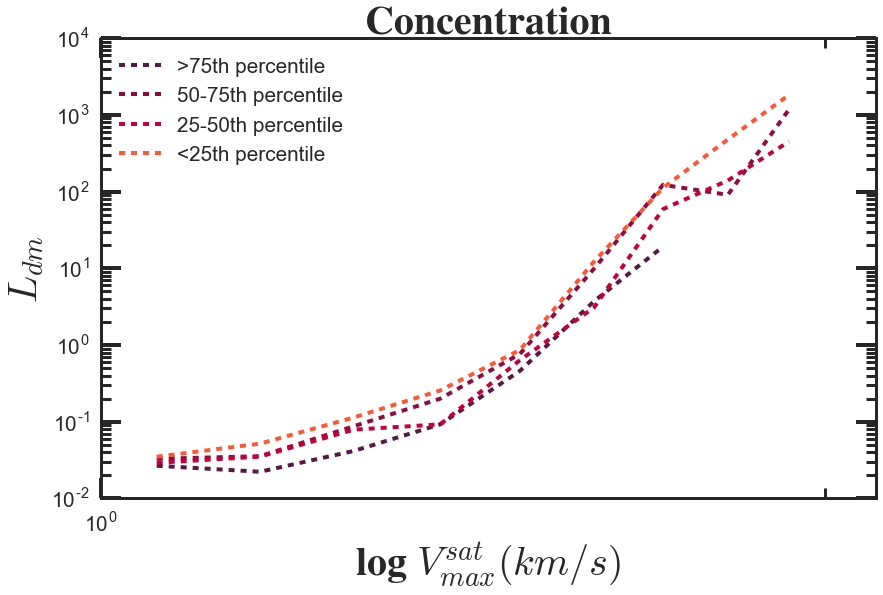

In [6]:
def plotting():
    twentyfifth, fifty, seventyfifth = get_percentile()
    Ldms25, Ldms50, Ldms75, Ldmsxx = calculate_Ldm()
    vmax75s = []
    vmax50s = []
    vmax25s = []
    vmaxxs= []
    all_vmaxs = []
    rootdir = '/Users/catherinefielder/Documents/Research_Halos/HaloDetail'
    for subdir, dirs, files in os.walk(rootdir):
        head,tail = os.path.split(subdir)
        for file in files:      
            if file.endswith('_columnsadded_final'):
                values = ascii.read(os.path.join(subdir, file), format = 'commented_header') #Get full path and access file
                #Same limits applied to velocity
                whlimit = np.where((values['vmax(16)']<100.) & (values['vmax(16)']>10.))
                c=values[1]['host_c'] 
                #Get the vmax for all of the subhalos and append to the quartile
                if c >= seventyfifth:
                    vmax75 = values[whlimit]['vmax(16)']
                    vmax75s = np.append(vmax75s, vmax75)

                if c >= fifty and c < seventyfifth:
                    vmax50 = values[whlimit]['vmax(16)'] 
                    vmax50s = np.append(vmax50s, vmax50)
             
                if  c < fifty and c >= twentyfifth:
                    vmax25 = values[whlimit]['vmax(16)']
                    vmax25s = np.append(vmax25s, vmax25)
                   
                if c < twentyfifth:
                    vmaxx = values[whlimit]['vmax(16)']
                    vmaxxs = np.append(vmaxxs, vmaxx)
                    
                #Get all of the vmaxs of all of he subhalos for calculating bins
                all_vmax = values[whlimit]['vmax(16)']
                all_vmaxs = np.append(all_vmaxs, all_vmax)         
    
    #Re-scale the y axis so it is not tiny
    norm_new_y75=1000.*Ldms75
    norm_new_y50=1000.*Ldms50
    norm_new_y25=1000.*Ldms25
    norm_new_yx=1000.*Ldmsxx
    
    #BINNING SECTION
    total_bins = 10
    #logspace the bins
    bins = np.linspace(np.log10(all_vmaxs.min()),np.log10(all_vmaxs.max()),total_bins)
    #Separation of the bins
    delta = bins[1]-bins[0]

    #Place each quartile into bins
    idx75  = np.digitize(np.log10(vmax75s),bins)
    #Calculate the running median
    running_median75 = [np.median(norm_new_y75[idx75==k]) for k in range(total_bins)]
    #Calculate std
    running_std75 = [np.log10(norm_new_y75)[idx75==k].std() for k in range(total_bins)]

    idx50  = np.digitize(np.log10(vmax50s),bins)
    running_median50 = [np.median(norm_new_y50[idx50==k]) for k in range(total_bins)]
    
    idx25  = np.digitize(np.log10(vmax25s),bins)
    running_median25 = [np.median(norm_new_y25[idx25==k]) for k in range(total_bins)]
    
    idxx  = np.digitize(np.log10(vmaxxs),bins)
    running_medianx = [np.median(norm_new_yx[idxx==k]) for k in range(total_bins)]
    
    #PLOTTING SECTION
    fig = plt.figure()
    ax = fig.add_subplot(111)
    
    #Make the plots
    plt.plot(bins-delta/2,running_median75,'--',lw=4,alpha=1,color='#581845',label='>75th percentile')
    plt.plot(bins-delta/2,running_median50,'--',lw=4,alpha=1,color='#900C3F',label='50-75th percentile')
    plt.plot(bins-delta/2,running_median25,'--',lw=4,alpha=1,color='#C70039',label='25-50th percentile')
    plt.plot(bins-delta/2,running_medianx,'--',lw=4,alpha=1,color='#FF5733',label='<25th percentile')
 
    #Plot formatting  
    axis_font = {'fontname':'STIXGeneral','size':'40', 'weight':'bold'}  
    #plt.ylim(ymin=0.01, ymax=1000.)
    plt.xlim(xmin=1.0, xmax=2.1)
    plt.xscale('log')
    plt.yscale('log')
    plt.title('Concentration', **axis_font)
    plt.xlabel('log $V_{max}^{sat} (km/s)$',**axis_font)
    plt.ylabel('$L_{dm}$',**axis_font)
    plt.setp(ax.spines.values(), linewidth=3)
    ax.get_yaxis().set_tick_params(which='both', direction='in')
    ax.get_xaxis().set_tick_params(which='both', direction='in')
    plt.legend(loc='best', mode="expand")
    sns.set_style("whitegrid")
    sns.set(style='ticks', palette='Set2')
    sns.set_context("poster", font_scale=1.3)
    matplotlib.rcParams['xtick.major.size'] = 20
    matplotlib.rcParams['xtick.major.width'] = 4
    matplotlib.rcParams['xtick.minor.size'] = 10
    matplotlib.rcParams['xtick.minor.width'] = 3
    matplotlib.rcParams['ytick.major.size'] = 20
    matplotlib.rcParams['ytick.major.width'] = 4
    matplotlib.rcParams['ytick.minor.size'] = 10
    matplotlib.rcParams['ytick.minor.width'] = 3
    ax.get_yaxis().set_tick_params(which='both', direction='in')
    ax.get_xaxis().set_tick_params(which='both', direction='in')
    plt.tight_layout()
    plt.draw()
    plt.show()

plotting()  